# Proyek Analisis Data: [🚲DASHBOARD BIKE SHARING SYSTEM🚲]

## Pertanyaan

## Import Semua Packages/Library yang Digunakan

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

#### Gathering Data

In [153]:
os.getcwd()
os.chdir('E:\\KULIAH\\Semester 6\\Bangkit\\Proyek Analisis Data')

In [154]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [155]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Assessing Data

###### Menilai tabel day_df

In [156]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [157]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [158]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [159]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


###### Menilai tabel hour_df

In [160]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [161]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [162]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [163]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Cleaning Data

###### Tabel day_df

In [164]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [165]:
# Menampilkan informasi mengenai missing values dalam DataFrame
print("Info Missing Values:")
print(day_df.info())

Info Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [166]:
# Menampilkan jumlah missing values per kolom
print("\nJumlah Missing Values per Kolom:")
print(day_df.isnull().sum())


Jumlah Missing Values per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [167]:
# Menampilkan persentase missing values per kolom
print("\nPersentase Missing Values per Kolom:")
print((day_df.isnull().sum() / len(day_df)) * 100)


Persentase Missing Values per Kolom:
instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [168]:
day_df['season'] = day_df['season'].replace({1:'springer', 2:'summer', 3:'fall', 4:'winter'})
day_df['yr'] = day_df['yr'].replace({0: '2011', 1:'2012'})
day_df['holiday'] = day_df['holiday'].replace({0: 'Holiday', 1:'non-Holiday'})
day_df['weekday'] = day_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
day_df['workingday'] = day_df['workingday'].replace({0: 'Workingday', 1:'Weekend nor holiday'})
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,Holiday,Saturday,Workingday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,Holiday,Sunday,Workingday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,Holiday,Monday,Weekend nor holiday,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,Holiday,Tuesday,Weekend nor holiday,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,Holiday,Wednesday,Weekend nor holiday,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


###### Tabel hour_df

In [169]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [170]:
# Menampilkan informasi mengenai missing values dalam DataFrame
print("Info Missing Values:")
print(hour_df.info())

Info Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [171]:
# Menampilkan jumlah missing values per kolom
print("\nJumlah Missing Values per Kolom:")
print(hour_df.isnull().sum())


Jumlah Missing Values per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [172]:
# Menampilkan persentase missing values per kolom
print("\nPersentase Missing Values per Kolom:")
print((hour_df.isnull().sum() / len(day_df)) * 100)


Persentase Missing Values per Kolom:
instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


In [173]:
hour_df['season'] = hour_df['season'].replace({1:'springer', 2:'summer', 3:'fall', 4:'winter'})
hour_df['yr'] = hour_df['yr'].replace({0: '2011', 1:'2012'})
hour_df['holiday'] = hour_df['holiday'].replace({0: 'Holiday', 1:'non-Holiday'})
hour_df['weekday'] = hour_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hour_df['workingday'] = hour_df['workingday'].replace({0: 'Workingday', 1:'Weekend nor holiday'})
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,Holiday,Saturday,Workingday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,1,1,Holiday,Saturday,Workingday,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,1,2,Holiday,Saturday,Workingday,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,1,3,Holiday,Saturday,Workingday,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,1,4,Holiday,Saturday,Workingday,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

In [174]:
hourly_day = hour_df[hour_df["dteday"] == '2011-01-03']
#tanggalnya dapat diganti untuk melihat perubahan per hari
hourly_day

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
47,48,2011-01-03,springer,2011,1,0,Holiday,Monday,Weekend nor holiday,1,0.22,0.1970,0.44,0.3582,0,5,5
48,49,2011-01-03,springer,2011,1,1,Holiday,Monday,Weekend nor holiday,1,0.20,0.1667,0.44,0.4179,0,2,2
49,50,2011-01-03,springer,2011,1,4,Holiday,Monday,Weekend nor holiday,1,0.16,0.1364,0.47,0.3881,0,1,1
50,51,2011-01-03,springer,2011,1,5,Holiday,Monday,Weekend nor holiday,1,0.16,0.1364,0.47,0.2836,0,3,3
51,52,2011-01-03,springer,2011,1,6,Holiday,Monday,Weekend nor holiday,1,0.14,0.1061,0.50,0.3881,0,30,30
52,53,2011-01-03,springer,2011,1,7,Holiday,Monday,Weekend nor holiday,1,0.14,0.1364,0.50,0.1940,1,63,64
53,54,2011-01-03,springer,2011,1,8,Holiday,Monday,Weekend nor holiday,1,0.14,0.1212,0.50,0.2836,1,153,154
54,55,2011-01-03,springer,2011,1,9,Holiday,Monday,Weekend nor holiday,1,0.16,0.1364,0.43,0.3881,7,81,88
55,56,2011-01-03,springer,2011,1,10,Holiday,Monday,Weekend nor holiday,1,0.18,0.1667,0.43,0.2537,11,33,44
56,57,2011-01-03,springer,2011,1,11,Holiday,Monday,Weekend nor holiday,1,0.20,0.1818,0.40,0.3284,10,41,51


In [175]:
day_total = hourly_day["cnt"].sum()
day_total

1349

In [176]:
jam_tertinggi = hourly_day.loc[hourly_day["cnt"] == hourly_day["cnt"].max(), "hr"].iloc[0]
jam_tertinggi

17

In [177]:
day_weekday = day_df.groupby("weekday")["cnt"].sum().reset_index(name="jumlah_persewaan")
day_order_mapping = {"Sunday": 0,"Monday": 1,"Tuesday": 2,"Wednesday": 3,"Thursday": 4,"Friday": 5,"Saturday": 6,}
day_weekday["weekday_order"] = day_weekday["weekday"].map(day_order_mapping)
day_weekday = day_weekday.sort_values(by="weekday_order")
day_weekday = day_weekday.drop("weekday_order", axis=1)
day_weekday

,weekday,jumlah_persewaan
3,Sunday,444027
1,Monday,455503
5,Tuesday,469109
6,Wednesday,473048
4,Thursday,485395
0,Friday,487790
2,Saturday,477807


In [178]:
day_weekday_max_rentals = day_weekday.loc[day_weekday['jumlah_persewaan'].idxmax()]
print("Hari Dengan Jumlah Penyewaan Tertinggi:", day_weekday_max_rentals['weekday'])

Hari Dengan Jumlah Penyewaan Tertinggi: Friday


In [179]:
day_max_rentals = day_weekday.loc[day_weekday['jumlah_persewaan'].idxmax()]
print("Dengan Jumlah Penyewaan Sebesar:", day_max_rentals['jumlah_persewaan'])

Dengan Jumlah Penyewaan Sebesar: 487790


## Visualization & Explanatory Analysis

###### Pertanyaan 1: Bagaimana pola total peminjaman sepeda berubah dalam sehari?

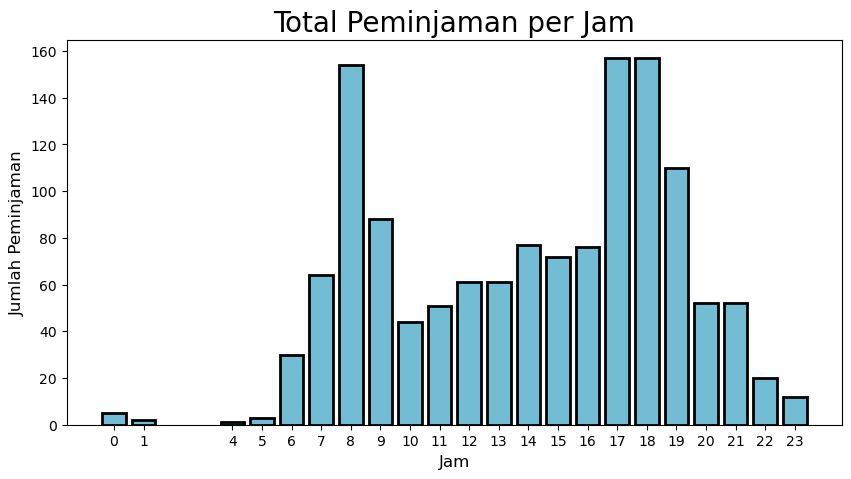

In [180]:
plt.figure(figsize=(10, 5))
plt.bar(
    hourly_day["hr"],
    hourly_day["cnt"],
    color="#72BCD4",
    edgecolor="black",  # Warna tepi batang
    linewidth=2,  # Ketebalan tepi batang
)
plt.title("Total Peminjaman per Jam", loc="center", fontsize=20)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah Peminjaman", fontsize=12)
plt.xticks(hourly_day["hr"], fontsize=10)
plt.yticks(fontsize=10)
plt.show()

###### Pertanyaan 2 :Apakah ada tren harian atau perbedaan dalam jumlah persewaan sepeda antara hari kerja dan hari libur?

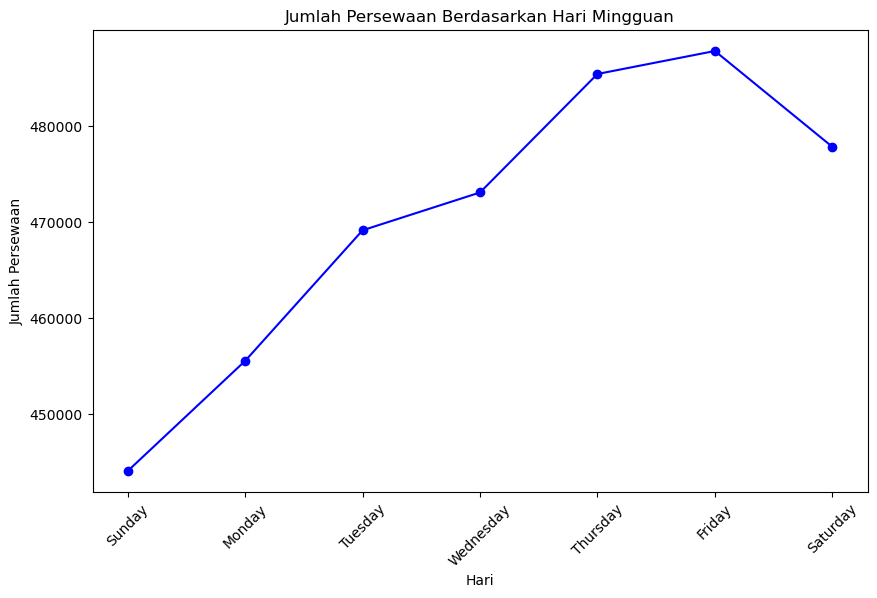

In [181]:
plt.figure(figsize=(10, 6))
plt.plot(day_weekday["weekday"], day_weekday["jumlah_persewaan"], marker='o', linestyle='-', color='b')
plt.title('Jumlah Persewaan Berdasarkan Hari Mingguan')
plt.xlabel('Hari')
plt.ylabel('Jumlah Persewaan')
plt.xticks(rotation=45)
plt.show()

###### Pertanyaan 3 :Bagaimana hubungan antara jumlah pengguna sepeda dan temperatur?

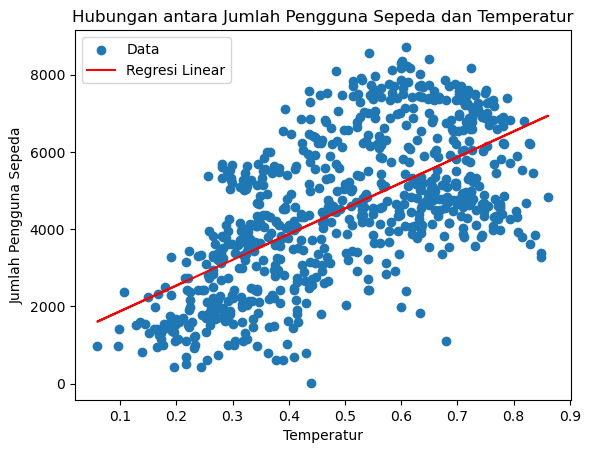

In [182]:
coefficients = np.polyfit(day_df["temp"], day_df["cnt"], 1)
regression_line = np.polyval(coefficients, day_df["temp"])
plt.scatter(day_df["temp"], day_df["cnt"], label="Data")
plt.plot(day_df["temp"], regression_line, color="red", label="Regresi Linear")
plt.xlabel("Temperatur")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.title("Hubungan antara Jumlah Pengguna Sepeda dan Temperatur")
plt.legend()
plt.show()
plt.show()

## Conclusion

###### Conclution pertanyaan 1

###### Conclution pertanyaan 2

###### Conclution pertanyaan 2